In [1]:
from egcd import egcd

In [3]:
pip install egcd


Note: you may need to restart the kernel to use updated packages.


In [2]:
def dd(x):
    if x < 0 : 
        x += 11
    if x % 2 == 1: 
        x += 11
    return x

I = [ dd(egcd(_,11)[1]) for _ in range(1,11)]


In [3]:
F = [ dd(-2*x % 11) for x in I]

In [4]:
def L2R(L):
    return '& ' + ' & '.join([str(_) for _ in L]) + ' \\\\'

In [5]:
print('\n'.join([ L2R(range(1,11)), L2R(I), L2R(F)] )) 

& 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
& 12 & 6 & 4 & 14 & 20 & 2 & 8 & 18 & 16 & 10 \\
& 20 & 10 & 14 & 16 & 4 & 18 & 6 & 8 & 12 & 2 \\


In [36]:
print(L2R(range(2,22, 2)))

& 2 & 4 & 6 & 8 & 10 & 12 & 14 & 16 & 18 & 20 \\


In [ ]:
import numpy as np

def Farey(n):
    F_n = np.array([[0,1], [1,1]])
    for k in range(n):
        tmp = np.zeros((2*F_n.shape[0]-1, 2))
        # copy F_n in 
        tmp[::2,] = F_n
        # add medians in
        tmp[1::2,] = F_n[:-1] + F_n[1:]
        F_n = tmp
    return F_n

QQ = Farey(4)

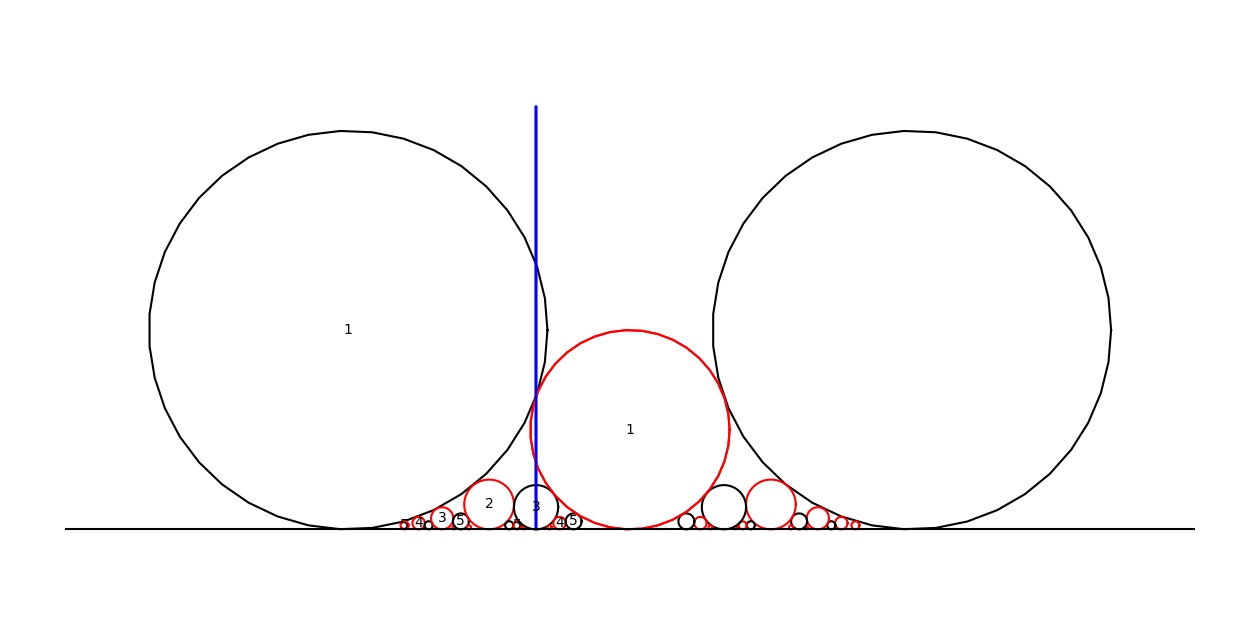

In [7]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(16,8)
ax.axis('equal')
ax.axis('off')

T = np.linspace(0,2*np.pi, 40)
motif = np.exp(1J*T)/2
SCALE = 200
data = []
for vv in QQ[:]:
    col = 'k'
    stroke = "#000000"
    r = np.sqrt(2)/vv[1]**2
    if vv[0] % 2 == 1 : 
        r /= 2
        col = 'r'
        stroke = "#FF0000"
    mm  = r*motif 
    cx = vv[0]/vv[1]
    cy = .5*r

    plt.plot(mm.real + cx, 
             mm.imag + cy ,col);

    if vv[1] < 6:
        ax.annotate(
            str(int(vv[1])),
            xy=(cx, cy), 
            xytext=(3, -5),
            textcoords='offset points', ha='right', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )
    
    plt.plot(mm.real + 2 -  vv[0]/vv[1], 
             mm.imag + .5*r,col);

    plt.plot([2/3]*2,[0,1.5],'b')

   
    r *= SCALE/2
    cx = SCALE*cx + 2*SCALE
    cy *= SCALE

    gg = f'<circle cx="{cx:.2f}" cy="{cy:.2f}" r="{r:.2f}" fill ="none" stroke = "{stroke}"/>'
    data.append(gg)
    cx = 4*SCALE - cx
    data.append(gg)
    
plt.plot([-1,3],[0,0],'k');
#plt.savefig('farey_mod.png')

ss = '''<svg viewBox="0 0 1000 1000" xmlns="http://www.w3.org/2000/svg">
  {}
</svg>'''.format('\n'.join(data))
with open('pp.svg','w') as fp:
    fp.write(ss)

In [48]:
ss = '''<svg viewBox="0 0 100 100" xmlns="http://www.w3.org/2000/svg">
  {}
</svg>'''.format('\n'.join(data))
with open('pp.svg','w') as fp:
    fp.write(ss)

In [24]:
def power_mod(b, e, m):
    " Without using builtin function "
    x = 1
    while e > 0:
        b, e, x = (
            b * b % m,
            e // 2,
            b * x % m if e % 2 else x
        )

    return x

def g(b):
    return power_mod(b,(N-1)/2,N)

L = np.arange(2,N-1).astype(int)
N = 41

M = g(L)
X = np.where(M == (N-1) )[0]




NameError: name 'N' is not defined

In [107]:
L[X]

array([ 3,  6,  7, 11, 12, 13, 14, 15, 17, 19, 22, 24, 26, 27, 28, 29, 30,
       34, 35, 38])

In [101]:
list(L**2 % N)

[4, 9, 16, 8, 2, 15, 13, 13, 15, 2, 8, 16, 9, 4]

In [103]:
10**2 % N

15

In [117]:
T = [6]
for k in range(N-2):
    T.append(T[0]*T[-1] % N)
T;

In [110]:
6**5 % 41

27

In [111]:
egcd(27,41)

(1, -3, 2)

In [113]:
24**2 % 41

2

In [39]:
11**4 % 17

4

4

In [34]:
4**2 % 17

16

In [118]:
xx = 1J*np.sqrt(2)

In [120]:
(xx + 1) / (2*xx + 3)*17

(7+1.414213562373095j)

In [121]:
(1J + 3)/(1J + 4)*17

(13+1j)

In [122]:
13**2 % 17

16

In [124]:
X = np.arange(41)**2 % 41

In [125]:
np.where(X == 2)

(array([17, 24]),)

In [126]:
17**2 % 41

2

In [128]:
5**2 + 4**2

41

In [130]:
(-xx - 1) / (4*xx + 3)*41

(-11+1.414213562373095j)

In [132]:
30**2 % 41

39

In [136]:
(-5*xx - 1) / (6*xx + 1)*73

(-60.99999999999999+1.4142135623730954j)

In [137]:
61**2 % 73

71

In [139]:
(xx + 2)/(xx + 3)*11

(8+1.414213562373095j)

In [140]:
8**2 % 11

9

<module 'numpy' from '/home/macbuse/miniconda3/lib/python3.11/site-packages/numpy/__init__.py'>

In [152]:
A = np.array([2,3,1,2]).reshape((2,2))
J = np.array([0,-3,1,0]).reshape((2,2))

In [156]:
M = A @ J @ np.linalg.inv(A)

In [155]:
A[0] = A[0] - A[1]
A

array([[1, 1],
       [1, 2]])

In [154]:
M@[12,7]

array([-3.,  0.])

In [157]:
M

array([[ 5., -4.],
       [ 7., -5.]])

In [158]:
A



array([[1, 1],
       [1, 2]])

In [202]:
p = 7
m = 3

for k in range(1,p-1):
    # get k inverse mod p
    a,k1,p1 = egcd(k,p)
    # get p inverse mod m
    u = egcd(p,m)[1]
    print( k1 -  p* (u*k1 % m )  )

-6
-3
-9
-12
3


In [228]:
J5 = np.array([1,-3,2,-1]).reshape(2,2)
P5 = np.array([1,5,0,1]).reshape(2,2)
J5 @ P5 @ J5   / 5

array([[ 1., -1.],
       [ 4., -3.]])

array([[-1, -2],
       [ 8, -9]])

In [214]:
J5 @ [1,0]

array([1, 2])

In [11]:
QQ

array([[0., 1.],
       [1., 5.],
       [1., 4.],
       [2., 7.],
       [1., 3.],
       [3., 8.],
       [2., 5.],
       [3., 7.],
       [1., 2.],
       [4., 7.],
       [3., 5.],
       [5., 8.],
       [2., 3.],
       [5., 7.],
       [3., 4.],
       [4., 5.],
       [1., 1.]])

In [13]:
X  = (QQ**2 @ [1,2]).astype(int)

In [14]:
X  % 8

array([2, 3, 1, 6, 3, 1, 6, 3, 1, 2, 3, 1, 6, 3, 1, 2, 3])

In [15]:
X

array([  2,  51,  33, 102,  19, 137,  54, 107,   9, 114,  59, 153,  22,
       123,  41,  66,   3])

In [16]:
QQ

array([[0., 1.],
       [1., 5.],
       [1., 4.],
       [2., 7.],
       [1., 3.],
       [3., 8.],
       [2., 5.],
       [3., 7.],
       [1., 2.],
       [4., 7.],
       [3., 5.],
       [5., 8.],
       [2., 3.],
       [5., 7.],
       [3., 4.],
       [4., 5.],
       [1., 1.]])

In [18]:
QQ.sort()


In [20]:
X.sort()

In [21]:
X

array([  2,   3,   9,  19,  22,  33,  41,  51,  54,  59,  66, 102, 107,
       114, 123, 137, 153])

In [22]:
102/3

34.0

In [23]:
2**2 + 2*7**2

102

In [32]:
A = np.array([1,-2,3,-1]).reshape(2,2)
B = np.array([0,-5,1,0]).reshape(2,2)
P = np.array([1,1,0,1]).reshape(2,2)

In [33]:
B@P@B

array([[-5,  0],
       [ 1, -5]])

In [30]:
A@P@A

array([[-2, -1],
       [ 9, -8]])

In [ ]:
https://www.cirm-math.fr/ProgWeebly/Renc1841/HanKim.pdf



In [7]:
import numpy as np

np.arange(8).astype(int)**4 % 17

array([ 0,  1, 16, 13,  1, 13,  4,  4])

In [8]:
2 + 9

11

In [10]:
11**2 % 17

2

In [12]:
np.arange(10).astype(int)**4 % 41

array([ 0,  1, 16, 40, 10, 10, 25, 23, 37,  1])

In [13]:
3 + 14

17

In [14]:
17**2 % 41

2

In [16]:
L = np.arange(18).astype(int)**4 % 73
L

array([ 0,  1, 16,  8, 37, 41, 55, 65,  8, 64, 72, 41,  4, 18, 18, 36, 55,
        9])

In [17]:
np.where(L==72)

(array([10]),)

In [20]:
10**4 %73

72

In [21]:
egcd(73,10)

(1, -3, 22)

In [25]:
32**2 % 73

2

In [32]:
x = 6
L = [x]
for k in range(15):
    L.append((x*L[-1]) % 17)
L

[6, 2, 12, 4, 7, 8, 14, 16, 11, 15, 5, 13, 10, 9, 3, 1]

In [19]:
import numpy as np
P = np.array([1,.5,0,1]).reshape(2,2)
A = np.array([1,0,0, 3]).reshape(2,2)
R = np.array([0,1,-1,1]).reshape(2,2)
X = P@A@np.linalg.inv(P)
X@R@np.linalg.inv(X)

In [62]:
import numpy as np
P = np.array([1,0,2,1]).reshape(2,2)
Q = np.array([1,-1,0,1]).reshape(2,2)
A = np.array([1,0,0, 3]).reshape(2,2)
R = np.array([0,1,-1,1]).reshape(2,2)
RR = Q@R@np.linalg.inv(Q)
P@R@np.linalg.inv(P)

array([[-2.,  1.],
       [-7.,  3.]])

In [39]:
w = np.exp(2*np.pi/3*1J)

In [37]:
np.abs(w + 1)**2

2.9999999999999996

In [64]:
P@RR@np.linalg.inv(P)

array([[-1.,  1.],
       [-3.,  2.]])

In [65]:
RR

array([[ 1.,  1.],
       [-1.,  0.]])

In [67]:
(w+1)/-w

(-0.5000000000000001+0.8660254037844387j)

In [68]:
w

(-0.4999999999999998+0.8660254037844387j)

array([[1, 1],
       [0, 1]])